##Deep learning categorizing with MNIST dataset
### handwriting data

In [90]:
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential, load_model
from keras.datasets import mnist
from keras.utils import to_categorical, custom_object_scope

In [91]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f"X_train_shape: {X_train.shape}")
print(f"y_train_shape: {y_train.shape}")
print(f"X_test_shape: {X_test.shape}")
print(f"y_test_shape: {y_test.shape}")

X_train_shape: (60000, 28, 28)
y_train_shape: (60000,)
X_test_shape: (10000, 28, 28)
y_test_shape: (10000,)


In [92]:
X_test[4]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  50, 224,   0,
          0,   0,   0,   0,   0,   0,  70,  29,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [93]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

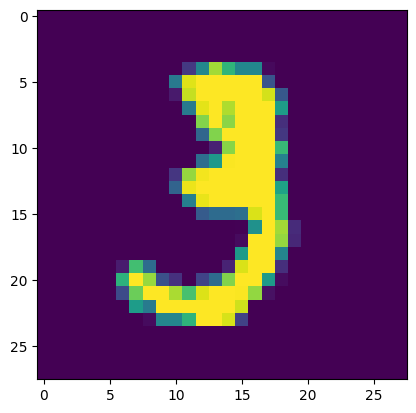

In [94]:
plt.imshow(X_train[10])
plt.show()

In [95]:
input_shape = X_train.shape[1] * X_train.shape[2]  # size: 28 * 28
number_of_classes = len(set(y_train))  # labels. Number 0~9(10 numbers)

X_train = X_train / 255.0
X_test = X_test / 255

###
X_train = X_train.reshape(-1, input_shape)  # 3 dim -> 2 dim
X_test = X_test.reshape(-1, input_shape)

print(f"X_train_shape: {X_train.shape}")  # X_train_shape: (60000, 784)
print(f"X_test_shape: {X_test.shape}")  # X_test_shape: (10000, 784)

X_train_shape: (60000, 784)
X_test_shape: (10000, 784)


In [96]:
y_train = to_categorical(y_train, number_of_classes)  # One-hot encoding. 1 dim -> 2 dim
y_test = to_categorical(y_test, number_of_classes)    #

print(f"y_train_shape: {y_train.shape}")  # y_train_shape: (60000, 10)
print(f"y_test_shape: {y_test.shape}")  # y_test_shape: (10000, 10)

y_train_shape: (60000, 10)
y_test_shape: (10000, 10)


In [97]:
model = Sequential() #model

In [98]:
model.add(Dense(128, activation = "relu", input_shape=X_train.shape[1:]))

In [99]:
model.add(Dense(y_train.shape[1], activation="softmax"))

In [100]:
model.compile(#loss="mean_squared_error",
              #loss="categorial_crossentropy",
              loss = "categorical_crossentropy",
              #loss=tf.keras.losses.CategoricalCrossentropy()
              optimizer="adam",
              metrics=["acc"])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [101]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.3)
loss, acc = model.evaluate(X_test, y_test)
print("loss: ", loss)
print("acc: ", acc)

Epoch 1/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.3080 - acc: 0.9115 - val_loss: 0.1776 - val_acc: 0.9481
Epoch 2/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.1383 - acc: 0.9589 - val_loss: 0.1293 - val_acc: 0.9604
Epoch 3/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0931 - acc: 0.9726 - val_loss: 0.1156 - val_acc: 0.9650
Epoch 4/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0672 - acc: 0.9800 - val_loss: 0.1023 - val_acc: 0.9684
Epoch 5/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0502 - acc: 0.9845 - val_loss: 0.0991 - val_acc: 0.9695
Epoch 6/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0398 - acc: 0.9875 - val_loss: 0.0951 - val_acc: 0.9721
Epoch 7/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0308 - acc: 0.9907 - val_loss: 0.0946 - val_acc: 0.9730
Epoch 8/10
1313/1313 [==============================] - 8s 6ms

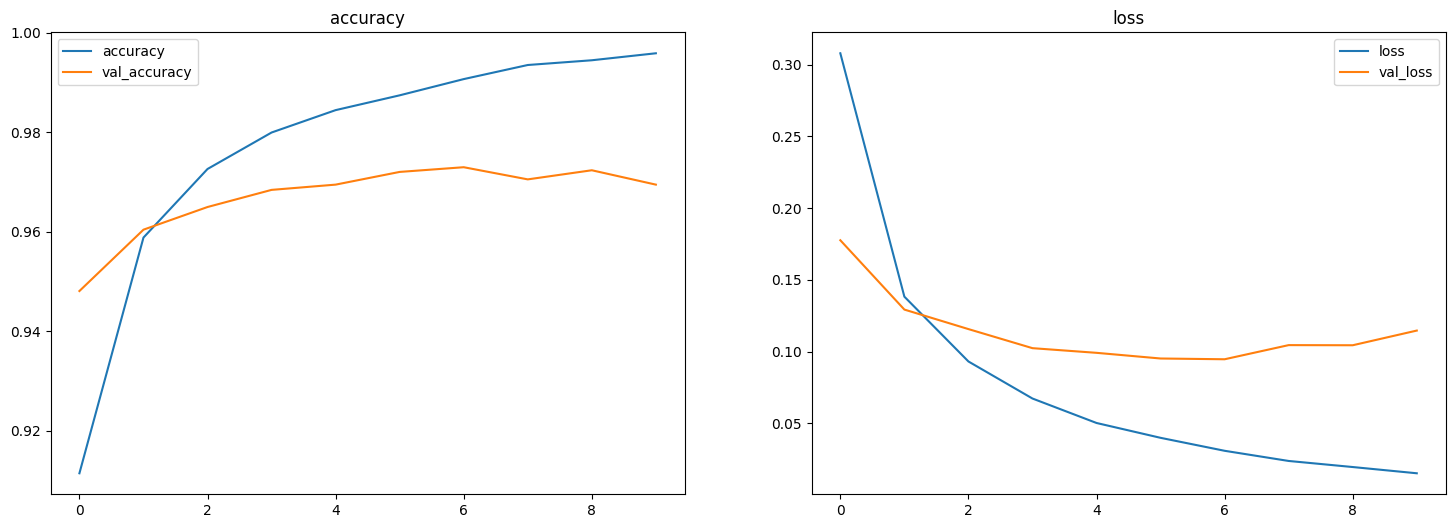

In [102]:
plt.figure(figsize=(18, 6))

# acc
plt.subplot(1,2,1)
plt.plot(history.history["acc"], label="accuracy")
plt.plot(history.history["val_acc"], label="val_accuracy")
plt.title("accuracy")
plt.legend()

# loss
plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.title("loss")
plt.legend()

plt.show()

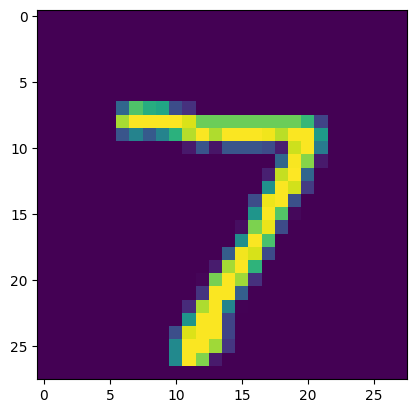

1/1 [==============================] - 0s 28ms/step
real: 7
predict: 7


In [106]:
#test with data
plt.imshow(X_test[0].reshape(28, 28))
plt.show()

pred = model.predict(X_test[:1])[0]

print("real:", y_test[0].argmax())  # 7
print("predict:", pred.argmax())  # 7

In [112]:
#test with drawing image
# Import the dataset
from google.colab import files

file = files.upload()

Saving 5.jpg to 5 (1).jpg


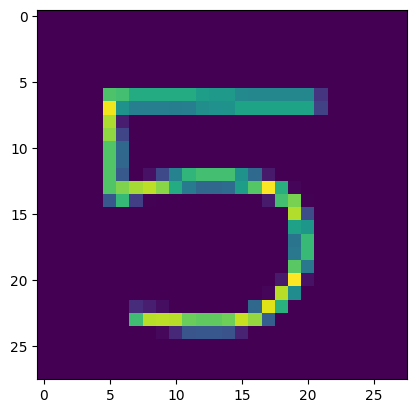

1/1 [==============================] - 0s 67ms/step
predict: 5


In [113]:
from PIL import Image
import numpy as np


image = Image.open("5.jpg")  # load img
image = image.convert('L')  # to black and white
image = image.resize((28, 28))  # resize

data = np.array(image.getdata())  # to numpy array
data = data.reshape(1, 28 * 28)  # flatten
data = data.astype('float32') / 255.0  # rescaling to be 0 ~ 1

# the model takes white as 1, black as 0
# color inversion is neede.
data = 1 - data

plt.imshow(data.reshape(28,28)) #reshape again
plt.show()

pred = model.predict(data)
print("predict:", pred.argmax())  # 5